# Multiple Linear Regression - Utkarsh Gaikwad 

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [3]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
type(california)

sklearn.utils._bunch.Bunch

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
california.target_names

['MedHouseVal']

In [9]:
print(california['data'])

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [10]:
print(california['target'])

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [11]:
# Create Dataframe
import pandas as pd
dataset = pd.DataFrame(california.data,columns=california.feature_names)
dataset['Price'] = california.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
# Check missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [13]:
# Check duplicated
dataset.duplicated().sum()

0

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


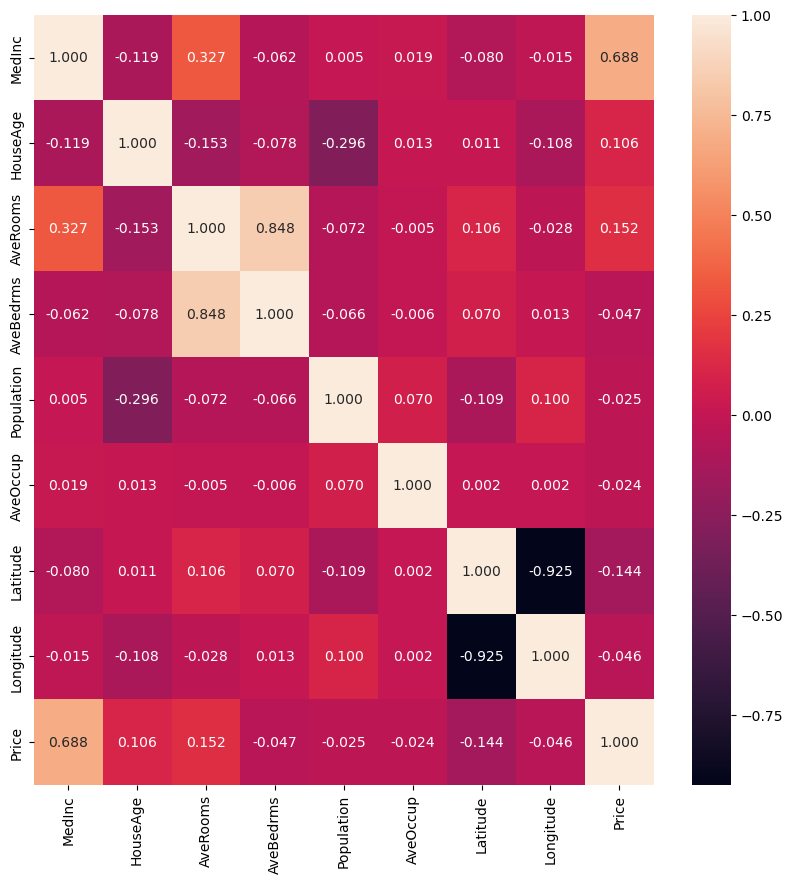

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.3f')
plt.show()

In [17]:
# Independet and Dependent features
X = dataset.drop(labels=['Price'],axis=1)
Y = dataset[['Price']]

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=10)

In [21]:
xtrain.shape, ytrain.shape

((13828, 8), (13828, 1))

In [22]:
xtest.shape, ytest.shape

((6812, 8), (6812, 1))

In [23]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain =pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [24]:
xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.729868,1.220819,-0.703060,-0.128211,-0.953237,0.058612,0.969294,-1.439797
1,-0.610467,-0.284398,0.078280,0.020085,-0.100776,0.130159,-0.758235,1.082049
2,0.007846,-0.601286,-0.244738,0.054761,0.907795,-0.097933,0.945949,-1.245426
3,0.566537,-0.918174,0.567733,-0.144571,-0.342833,-0.079933,-0.431405,-0.443020
4,1.599708,0.745487,0.288904,-0.266010,0.025515,-0.097355,0.880583,-1.355071


In [25]:
xtest.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.751549,-1.314283,-0.393762,-0.265794,-0.895354,0.126067,-0.688200,0.194918
1,0.059359,-0.125954,-0.330707,-0.001347,0.395616,-0.120210,0.894590,-1.365039
2,0.344057,-1.314283,-0.410071,-0.011244,0.427189,-0.155818,-0.916981,0.897646
3,-0.401077,0.032490,-0.339779,-0.136843,0.514891,0.229874,-0.711545,0.807936
4,0.430547,-1.789615,0.126423,-0.145303,-0.400716,-0.015970,0.549084,-0.148971


# Model Training

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [27]:
regressor.fit(xtrain,ytrain)

LinearRegression()

In [28]:
regressor.coef_

array([[ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
        -0.02810091, -0.93017985, -0.89505497]])

In [29]:
regressor.intercept_

array([2.06347681])

In [31]:
# Predicting test data
ytest_pred = regressor.predict(xtest)
ytest_pred

array([[3.00397485],
       [2.58011486],
       [2.3489077 ],
       ...,
       [3.09003708],
       [0.79152007],
       [2.04477012]])

In [32]:
# Evaluate model 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y,ypred)
    rmse = mse**0.5
    r2 = r2_score(y,ypred)
    return mae, mse, rmse, r2

In [34]:
# Print Evaluated Results on Train and Test Data
def print_evaluated_results(xtrain,ytrain,xtest,ytest,model):
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(xtrain,ytrain,model)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(xtest, ytest, model)
    print(f'Training MAE : {train_mae:.2f}')
    print(f'Training MSE : {train_mse:.2f}')
    print(f'Training RMSE : {train_rmse:.2f}')
    print(f'Training R2 : {train_r2:.4f}')
    print('\n============================================\n')
    print(f'Test MAE : {test_mae:.2f}')
    print(f'Test MSE : {test_mse:.2f}')
    print(f'Test RMSE : {test_rmse:.2f}')
    print(f'Test R2 : {test_r2:.4f}')

In [35]:
print_evaluated_results(xtrain,ytrain,xtest,ytest,regressor)

Training MAE : 0.53
Training MSE : 0.51
Training RMSE : 0.72
Training R2 : 0.6107


Test MAE : 0.54
Test MSE : 0.55
Test RMSE : 0.74
Test R2 : 0.5936


In [38]:
def adj_r2(x,y,pred):
    n, k = x.shape
    r2 = r2_score(y,pred)
    r2_adj = 1 - ((1-r2**2)*(n-1)/(n-k-1))
    return r2_adj

In [40]:
ytrain_pred = regressor.predict(xtrain)
ytest_pred = regressor.predict(xtest)
train_adj_r2 = adj_r2(xtrain,ytrain,ytrain_pred)
test_adj_r2 = adj_r2(xtest, ytest, ytest_pred)
print(f'Training adjusted r2 score : {train_adj_r2:.4f}')
print(f'Testing adjusted r2 score : {test_adj_r2:.4f}')

Training adjusted r2 score : 0.3726
Testing adjusted r2 score : 0.3516


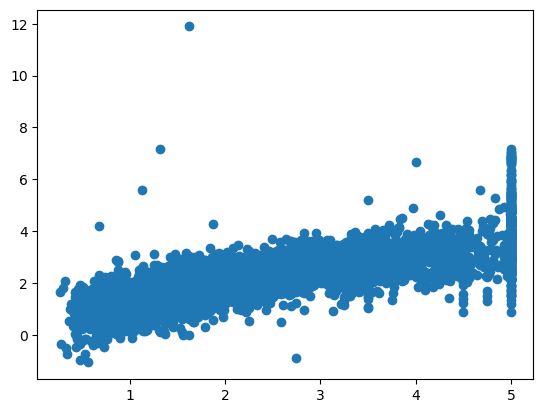

In [41]:
import matplotlib.pyplot as plt
plt.scatter(ytest, ytest_pred)
plt.show()

In [42]:
# Residuals
residuals = ytest - ytest_pred
residuals

,Price
20303,-1.329975
16966,0.960885
10623,-0.746908
6146,-0.307462
2208,-0.662167
...,...
13490,-0.243475
9340,0.507182
17439,-1.366037
2602,0.046480


<AxesSubplot: xlabel='Price', ylabel='Count'>

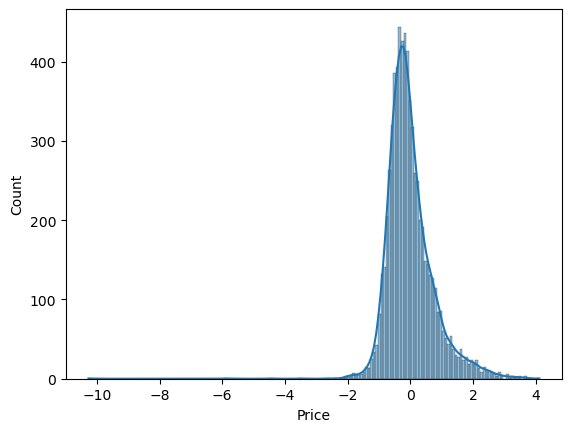

In [43]:
sns.histplot(residuals['Price'],kde=True)

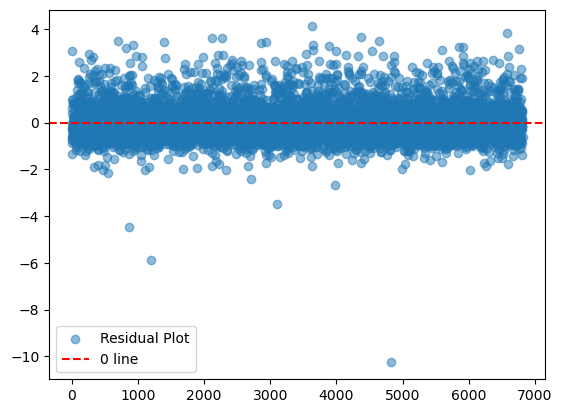

In [52]:
plt.scatter(range(len(ytest)),residuals['Price'],alpha=0.5,label='Residual Plot')
plt.axhline(0,linestyle='--',color='red',label='0 line')
plt.legend()
plt.show()

# Pickling

In [54]:
# Exporting pickle file
import pickle
with open('regressor.pkl','wb') as file:
    pickle.dump(regressor,file)

In [56]:
# Loading pickle file
with open('regressor.pkl','rb') as file:
    model = pickle.load(file)

In [57]:
model

LinearRegression()

In [58]:
model.predict(xtest)

array([[3.00397485],
       [2.58011486],
       [2.3489077 ],
       ...,
       [3.09003708],
       [0.79152007],
       [2.04477012]])